# **OCR using Convolutional Neural Networks.**
 **On [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.**

**Installing required libraries. In our case TensorFlow.**

In [10]:
!pip install tensorflow

### **Knowing the shape and exploring the dataset.**
**Importing [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, from TensorFlow Keras.**



In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [12]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


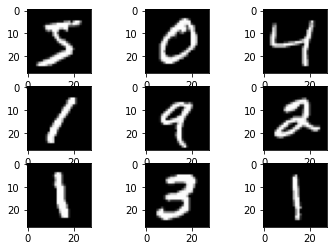

In [13]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


### **Reshaping and Normalizing the dataset**

Reshaping the array to 4-dims so that it can work with the Keras API.

Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

In [15]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


### **Keras imports for building our convolutional neural network (CNN) model.**


In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/5
469/469 [==============================] - 41s 87ms/step - loss: 0.1749 - accuracy: 0.9502 - val_loss: 0.0692 - val_accuracy: 0.9784
Epoch 2/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 3/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0342 - accuracy: 0.9897 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 4/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0521 - val_accuracy: 0.9847


**Observations:**


*   The CNN model is able to get 98%+ accuracy with just a single convolution layer.
*   We can also add more Conv2D layers, and also play around with the hyperparameters of the CNN model to increase the accuracy further more.


### **Making individual predictions.**

No. of values in test dataset:  10000


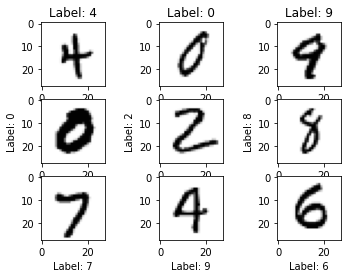

In [17]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:  
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

This is the individual character prediction from train dataset.

### **Evaluating Kearas model.**

In [46]:
import time
expected_label=Y_test[2345].argmax()
digit_image = X_test[2345].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('./mnist-model.h5')


Keras inferences with 0.05274093151092529 second in average
[[7.6969547e-10 6.5950162e-10 2.2239202e-08 2.7859372e-05 2.2992467e-06
  3.4237412e-06 2.6487391e-12 1.2932930e-04 5.7199271e-05 9.9977988e-01]]
Predicted value: 9
Correct prediction !


### **Conversion from Keras to ONNX.**
Importing ONNX packages from source.

In [19]:
!pip install --quiet -U onnxruntime
!pip install --quiet -U git+https://github.com/microsoft/onnxconverter-common
!pip install --quiet -U git+https://github.com/onnx/keras-onnx

     |████████████████████████████████| 3.8MB 2.8MB/s 
     |████████████████████████████████| 7.4MB 2.6MB/s 
     |████████████████████████████████| 81kB 2.1MB/s 


In [20]:
import keras2onnx
print("keras2onnx version is "+keras2onnx.__version__)
# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, 'mnist-onnx', debug_mode=1)
output_model_path = "./mnist-model.onnx"
# and save the model in ONNX format
keras2onnx.save_model(onnx_model, output_model_path)

tf executing eager_mode: True
tf.keras model eager_mode: False
Processing a keras layer - (dense_3: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_3/Softmax:0
	input : dense_2/Relu:0
Processing a keras layer - (dense_2: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_2/Relu:0
	input : flatten_1/Reshape:0
Processing a keras layer - (flatten_1: <class 'tensorflow.python.keras.layers.core.Flatten'>)
	output: flatten_1/Reshape:0
	input : max_pooling2d_1/MaxPool:0
Processing a keras layer - (max_pooling2d_1: <class 'tensorflow.python.keras.layers.pooling.MaxPooling2D'>)
	output: max_pooling2d_1/MaxPool:0
	input : conv2d_1/Relu:0
Processing a keras layer - (conv2d_1: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>)
	output: conv2d_1/Relu:0
	input : conv2d_1_input:0
var: conv2d_1_input
var: conv2d_1_input:0
var: conv2d_1_input:01
var: conv2d_1/Relu:0
var: max_pooling2d_1/MaxPool:0
var: flatten_1/Reshape:0
var: dense_2/Relu:0
var: dense_3/

keras2onnx version is 1.7.1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1690100   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 1,691,360
Trainable params: 1,691,360
Non-trainable params: 0
_________________________________________________________________
None


Converting the operator (flatten_1): <class 'tensorflow.python.keras.layers.core.Flatten'>
Converting the operator (flatten_1/Const): Const
Converting the operator (max_pooling2d_1): <class 'tensorflow.python.keras.layers.pooling.MaxPooling2D'>
Converting the operator (conv2d_1): <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
Converting the operator (Identity3): Identity


### **Evaluating ONNX model perfomance.**
Inference

In [44]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(output_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [45]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

ONNX inferences with 0.002775883674621582 second in average
ONNX predicted value: 9
Correct prediction !
The ONNX's and keras' prediction are matching !


*References:*

---


* [Medium.com/CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
* [TowardsDataScience.com/CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) 
* [Machine Learning & Deep Learning Fundamentals.](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)